In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [5]:
df = pd.read_csv("/content/House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [6]:
columns_to_drop = [
    'id', 'Date', 'Postal Code', 'Lattitude', 'Longitude',
    'living_area_renov', 'lot_area_renov', 'Number of schools nearby',
    'Distance from the airport']
df = df.drop(columns=columns_to_drop)

In [7]:
df.columns
df.shape

(14620, 14)

In [8]:
df['number of bathrooms'].unique()

array([2.5 , 2.75, 2.  , 3.25, 1.75, 2.25, 1.  , 1.5 , 3.  , 8.  , 3.5 ,
       4.25, 4.  , 5.  , 3.75, 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 6.75, 7.5 , 0.5 , 6.  , 7.75])

In [9]:
df['bathrooms'] = df['number of bathrooms'].apply(lambda x: max(1, round(x)))
df['bedrooms'] = df['number of bedrooms']
df['floors'] = df['number of floors'].apply(lambda x: max(1, round(x)))
df['condition'] = df['condition of the house']
df['grades'] = df['grade of the house']

In [10]:
df['bathrooms'].unique()
df['bedrooms'].unique()
df['floors'].unique()

array([2, 1, 3, 4])

In [11]:
df.drop(columns=['number of bathrooms','number of bedrooms','number of views','number of floors','grade of the house','condition of the house'], inplace=True)

In [12]:
df.drop(df[df['bedrooms']==33].index, inplace=True)
df.drop(df[df['bedrooms']==10].index, inplace=True)
df.drop(df[df['bedrooms']==11].index, inplace=True)
df.drop(df[df['bedrooms']==9].index, inplace=True)
df.drop(df[df['bedrooms']==8].index, inplace=True)
df.drop(df[df['bedrooms']==7].index, inplace=True)
df.drop(df[df['bedrooms']==6].index, inplace=True)

In [13]:
df.head()

,living area,lot area,waterfront present,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Price,bathrooms,bedrooms,floors,condition,grades
0,3650,9050,0,3370,280,1921,0,2380000,2,5,2,5,10
1,2920,4000,0,1910,1010,1909,0,1400000,2,4,2,5,8
2,2910,9480,0,2910,0,1939,0,1200000,3,5,2,3,8
3,3310,42998,0,3310,0,2001,0,838000,2,4,2,3,9
4,2710,4500,0,1880,830,1929,0,805000,2,3,2,4,8


In [14]:
df.drop(df[df['lot area'] > 10000].index, inplace=True)

In [15]:
df['grades'].unique()

array([10,  8,  9,  7,  6, 11,  5,  4, 12])

In [16]:
df.shape

(10283, 13)

In [17]:
df.drop(columns='Area of the house(excluding basement)',inplace=True)

In [18]:
df.drop(df[df['living area']/df['bedrooms']<300].index, inplace=True)

In [19]:
df1=df.copy()

In [20]:
df.drop(df[df['living area'] < 1000].index, inplace=True)
df.drop(df[df['grades'] > 10].index, inplace=True)

In [21]:
df['bathrooms'].unique()
df[df['bathrooms'] == 5]
df.drop(df[df['bathrooms'] > 4].index, inplace=True)

In [31]:
df.shape
df.describe()

,living area,lot area,waterfront present,Area of the basement,Built Year,Renovation Year,Price,bathrooms,bedrooms,floors,condition,grades
count,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9.366000e+03,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000
mean,1995.739910,6045.731582,0.002029,283.818386,1972.032992,87.847000,5.021446e+05,2.062353,3.355541,1.609225,3.417147,7.594384
std,693.469985,2404.680226,0.044997,397.129821,31.756214,409.567254,2.587629e+05,0.651057,0.773841,0.569163,0.663052,0.917532
min,1000.000000,520.000000,0.000000,0.000000,1900.000000,0.000000,1.049500e+05,1.000000,1.000000,1.000000,1.000000,5.000000
25%,1470.000000,4350.000000,0.000000,0.000000,1950.000000,0.000000,3.250000e+05,2.000000,3.000000,1.000000,3.000000,7.000000
50%,1860.000000,6225.500000,0.000000,0.000000,1977.000000,0.000000,4.450000e+05,2.000000,3.000000,2.000000,3.000000,7.000000
75%,2390.000000,7988.250000,0.000000,570.000000,2002.000000,0.000000,6.130000e+05,2.000000,4.000000,2.000000,4.000000,8.000000
max,5860.000000,10000.000000,1.000000,2170.000000,2015.000000,2015.000000,2.750000e+06,4.000000,5.000000,4.000000,5.000000,10.000000


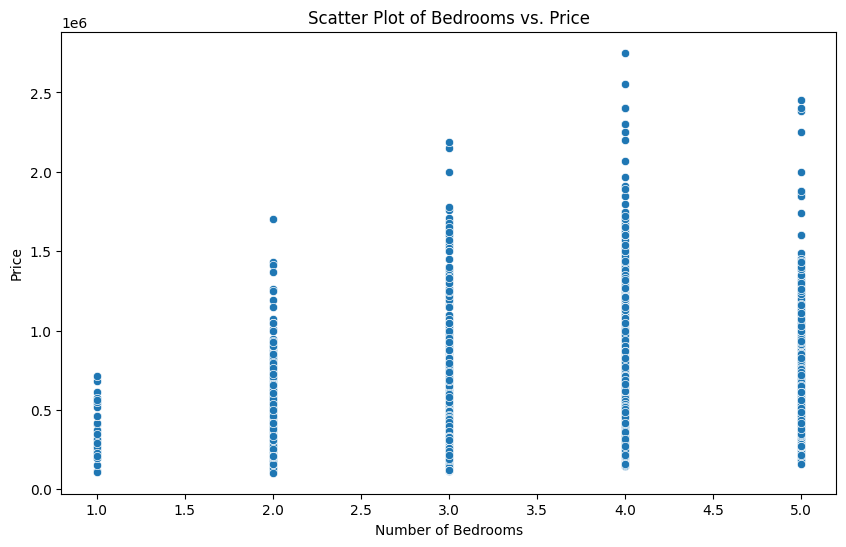

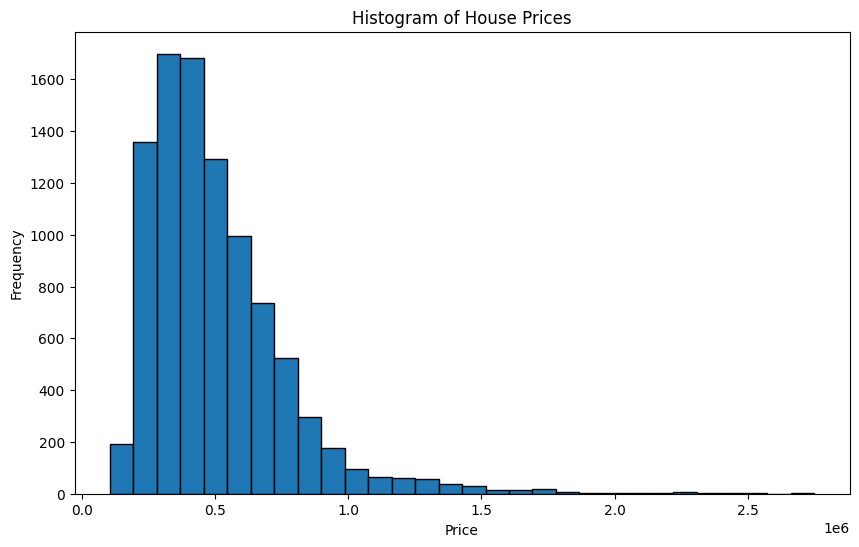

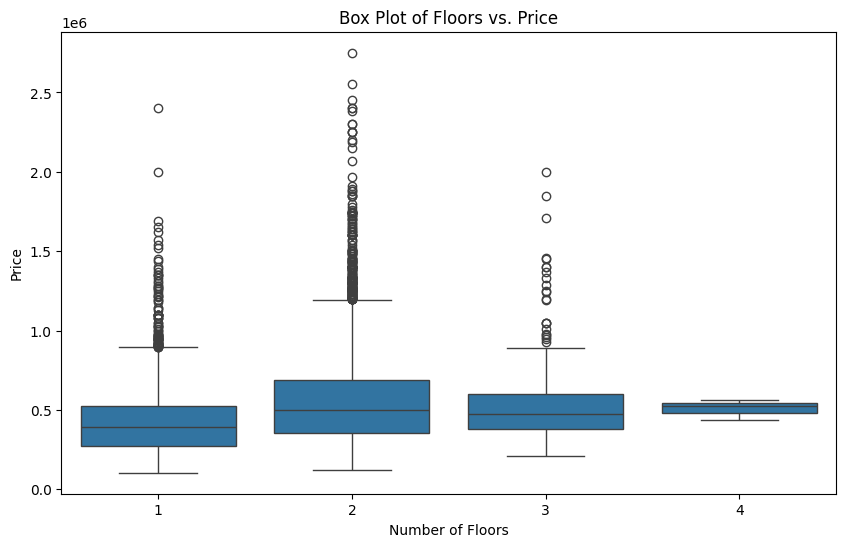

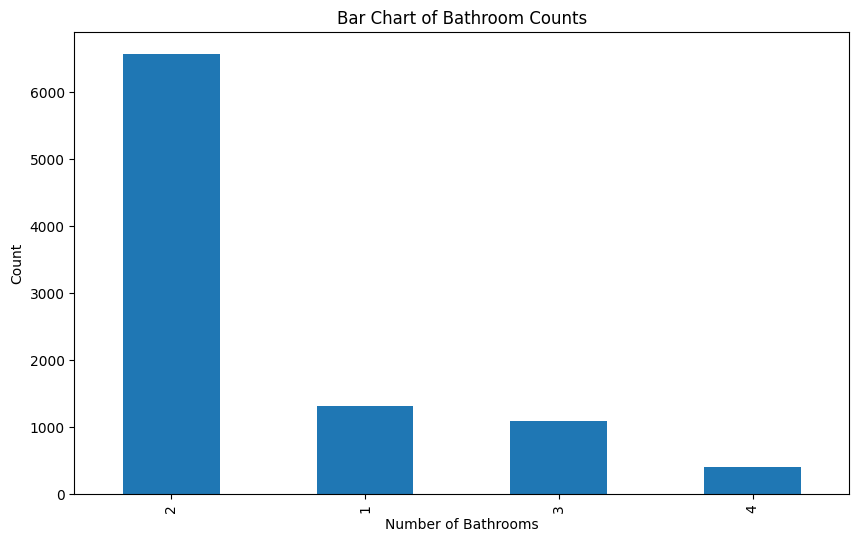

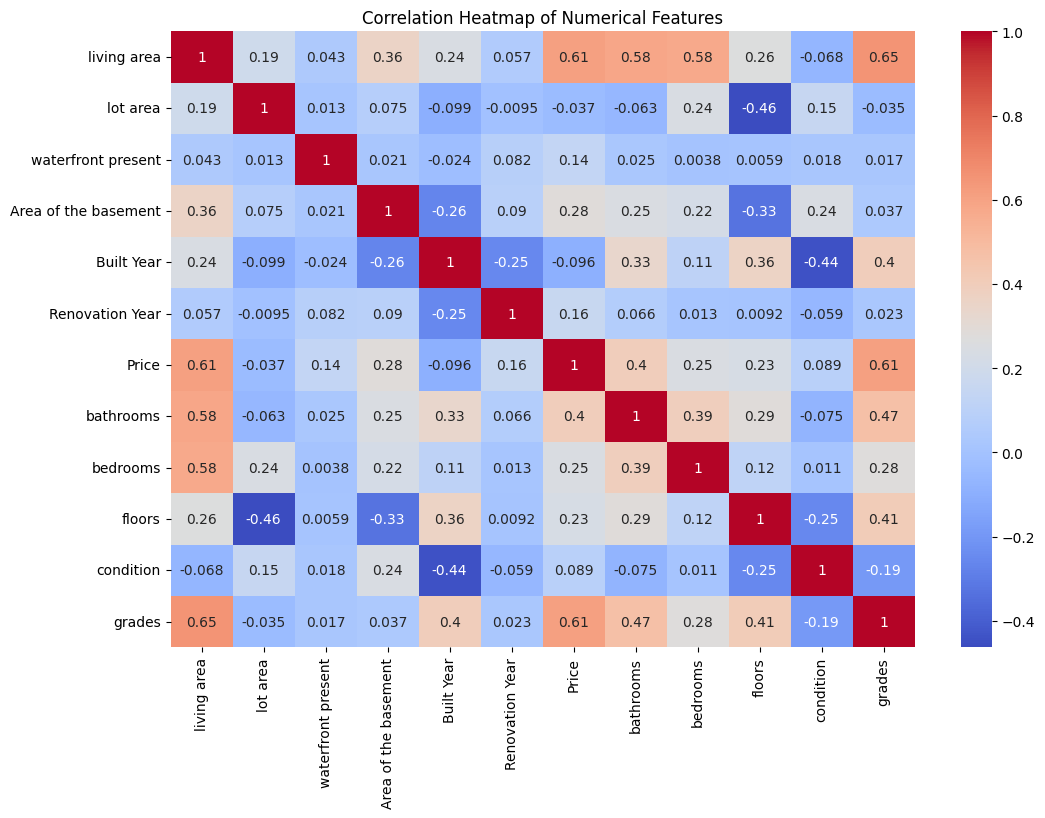

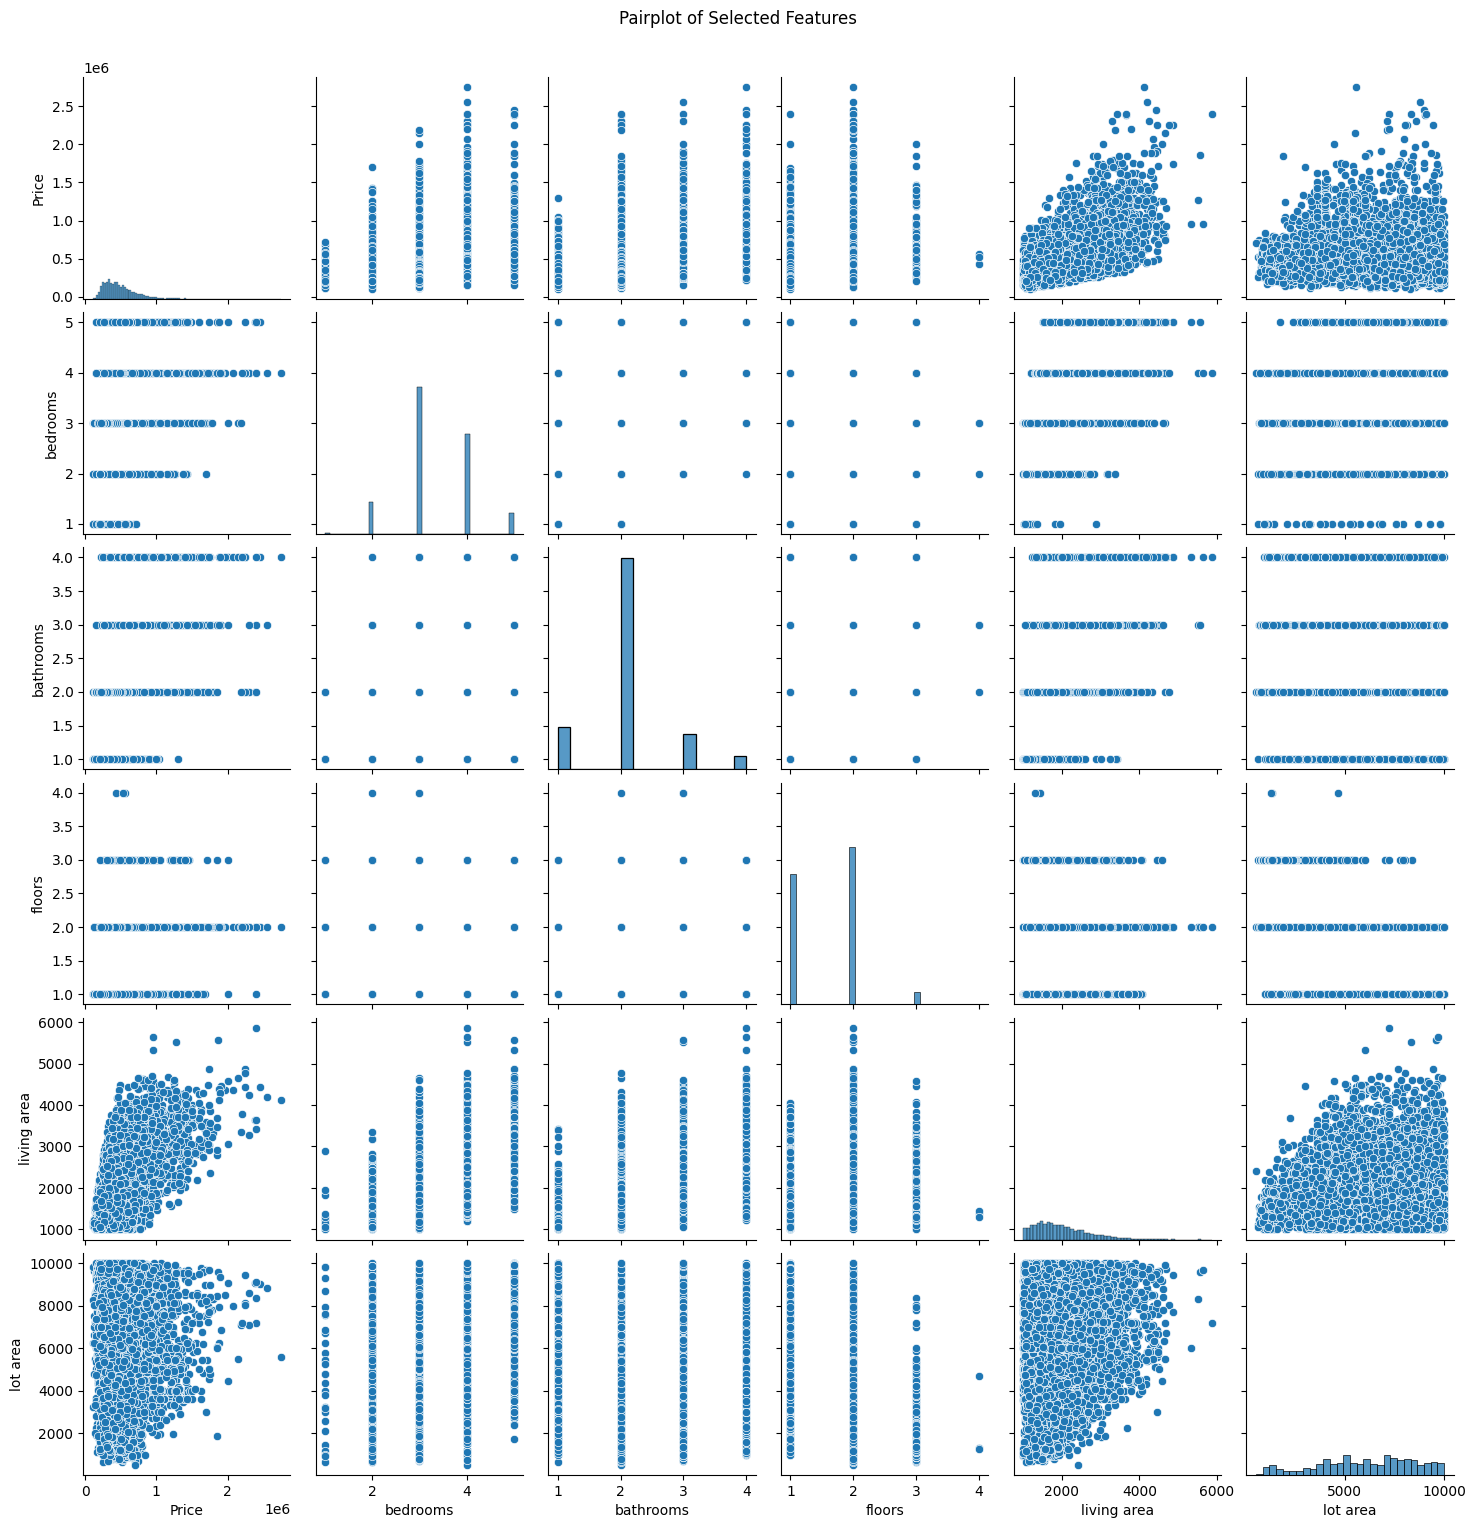

<ipython-input-23-3bf35c95c97c>:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True) # Use kdeplot for distribution plots


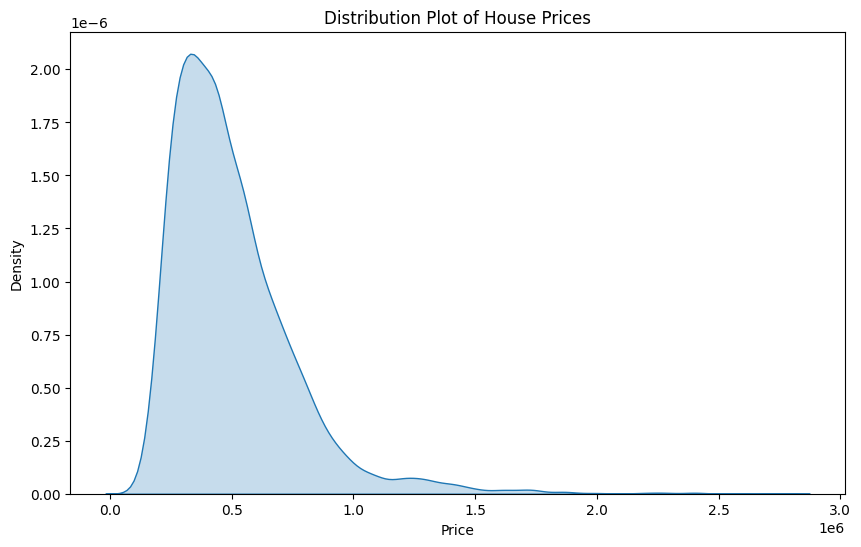

In [23]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='Price', data=df)
plt.title('Scatter Plot of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='floors', y='Price', data=df)
plt.title('Box Plot of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()

# Bar chart
plt.figure(figsize=(10, 6))
df['bathrooms'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Bathroom Counts')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()


# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Pairplot (for a subset of features to avoid excessive computation)
selected_features = ['Price', 'bedrooms', 'bathrooms', 'floors', 'living area', 'lot area']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Distribution plot (using seaborn's distplot, now kdeplot)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Price'], shade=True) # Use kdeplot for distribution plots
plt.title('Distribution Plot of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [24]:
X = df.drop('Price', axis='columns')
X.head()

,living area,lot area,waterfront present,Area of the basement,Built Year,Renovation Year,bathrooms,bedrooms,floors,condition,grades
0,3650,9050,0,280,1921,0,2,5,2,5,10
1,2920,4000,0,1010,1909,0,2,4,2,5,8
2,2910,9480,0,0,1939,0,3,5,2,3,8
4,2710,4500,0,830,1929,0,2,3,2,4,8
5,2600,4750,0,900,1951,0,2,3,1,4,9


In [25]:
Y = df.Price
Y.head()

,Price
0,2380000
1,1400000
2,1200000
4,805000
5,790000


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
r2_score(Y_test, y_pred)

0.6688532834745701

In [34]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=40)
cross_val_score(RandomForestRegressor(), X, Y, cv=cv)

array([0.66847215, 0.60594914, 0.64717438, 0.60945752, 0.66871491])

In [40]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, ShuffleSplit
import numpy as np

rf = RandomForestRegressor(random_state=40)
gb = GradientBoostingRegressor(random_state=40)
lr = LinearRegression()
lasso = Lasso(random_state=40)

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=40)

rf_score = cross_val_score(rf, X, Y, scoring='r2', cv=cv, n_jobs=-1)
gb_score = cross_val_score(gb, X, Y, scoring='r2', cv=cv, n_jobs=-1)
lr_score = cross_val_score(lr, X, Y, scoring='r2', cv=cv, n_jobs=-1)
lasso_score = cross_val_score(lasso, X, Y, scoring='r2', cv=cv, n_jobs=-1)

print("Random Forest Cross-Validation Score:", np.mean(rf_score))
print("Gradient Boosting Cross-Validation Score:", np.mean(gb_score))
print("Linear Regression Cross-Validation Score:", np.mean(lr_score))
print("Lasso Cross-Validation Score:", np.mean(lasso_score))

rf_best = rf.fit(X, Y)
gb_best = gb.fit(X, Y)
lr_best = lr.fit(X, Y)
lasso_best = lasso.fit(X, Y)

rf_predictions = rf_best.predict(X)
gb_predictions = gb_best.predict(X)
lr_predictions = lr_best.predict(X)
lasso_predictions = lasso_best.predict(X)

rf_mse = mean_squared_error(Y, rf_predictions)
gb_mse = mean_squared_error(Y, gb_predictions)
lr_mse = mean_squared_error(Y, lr_predictions)
lasso_mse = mean_squared_error(Y, lasso_predictions)

print("Random Forest Mean Squared Error:", rf_mse)
print("Gradient Boosting Mean Squared Error:", gb_mse)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Lasso Mean Squared Error:", lasso_mse)

Random Forest Cross-Validation Score: 0.6413625730183641
Gradient Boosting Cross-Validation Score: 0.6434593929159129
Linear Regression Cross-Validation Score: 0.6110812925620888
Lasso Cross-Validation Score: 0.6110852395848045
Random Forest Mean Squared Error: 3194974806.75613
Gradient Boosting Mean Squared Error: 19946456498.334835
Linear Regression Mean Squared Error: 25272180694.36773
Lasso Mean Squared Error: 25272181207.59742


In [41]:
import pickle
import json
from sklearn.ensemble import RandomForestRegressor

rf_best = RandomForestRegressor(random_state=40).fit(X, Y)

with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_best, model_file)
rf_params = {
    'n_estimators': rf_best.n_estimators,
    'max_depth': rf_best.max_depth,
    'min_samples_split': rf_best.min_samples_split,
    'min_samples_leaf': rf_best.min_samples_leaf,
    'max_features': rf_best.max_features,
    'random_state': rf_best.random_state
}

with open('random_forest_params.json', 'w') as params_file:
    json.dump(rf_params, params_file, indent=4)

print("Model and parameters saved successfully!")

Model and parameters saved successfully!
